## Первая попытка

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

sns.set(rc={'figure.figsize':(20,20)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)

In [2]:
diabetes_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# cols = diabetes_df.columns.to_list()
# diabetes_df[cols[1:6]] = diabetes_df[cols[1:6]].replace(0, np.NaN)

In [4]:
# проверка на нули и NaN-ы
for i in diabetes_df.columns:
    if diabetes_df[i].isnull().values.any():
        print(i)
        # diabetes_df = diabetes_df[diabetes_df[i].notna()]
        diabetes_df[i].fillna(diabetes_df[i].mean(), axis=0, inplace=True)

In [5]:
# разделение на train и test
train, test = np.split(diabetes_df.sample(frac=1), [int(0.8*len(diabetes_df))])

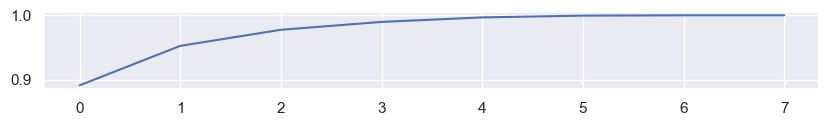

In [6]:
# количество признаков, необходимых для описания дисперсии данных
sample = train.drop('Outcome', axis=1)
pca_sample = PCA()
sample = pca_sample.fit_transform(sample)
plt.figure(figsize=(10,1))
plt.plot(np.cumsum(pca_sample.explained_variance_ratio_))

In [7]:
# StandardScaler и PCA
def preprocessing(df):
    x = df.drop('Outcome', axis=1)
    y = df['Outcome']
    sc = StandardScaler()
    x = sc.fit_transform(x)
    # pca = PCA(n_components=5)
    # x = pca.fit_transform(x)
    return x, y

In [8]:
# обучение моделей
X_train, Y_train = preprocessing(train)
X_test, Y_test = preprocessing(test)

model_0 = KNeighborsClassifier()
model_0.fit(X_train, Y_train)

model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

model_2 = GaussianNB()
model_2.fit(X_train, Y_train)

model_3 = SVC()
model_3.fit(X_train, Y_train)

model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

In [9]:
# тестирование моделей
print(
    f'Точность {model_0} составляет {accuracy_score(Y_test, model_0.predict(X_test))}\n'
    f'Точность {model_1} составляет {accuracy_score(Y_test, model_1.predict(X_test))}\n'
    f'Точность {model_2} составляет {accuracy_score(Y_test, model_2.predict(X_test))}\n'
    f'Точность {model_3} составляет {accuracy_score(Y_test, model_3.predict(X_test))}\n'
    f'Точность {model_4} составляет {accuracy_score(Y_test, model_4.predict(X_test))}'
)

Точность KNeighborsClassifier() составляет 0.7142857142857143
Точность LogisticRegression() составляет 0.7662337662337663
Точность GaussianNB() составляет 0.7402597402597403
Точность SVC() составляет 0.7662337662337663
Точность DecisionTreeClassifier() составляет 0.6558441558441559
